In [6]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import os
from sklearn.model_selection import train_test_split

In [7]:
classes = ['apple', 'airplane', 'cat', 'car', 'dog', 'flower', 'star', 'tree', 'umbrella', 'fish']

for item in classes:
    url = f"https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{item}.npy"
    !wget {url} -P quickdraw_dataset


--2025-07-18 16:11:47--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘quickdraw_dataset/apple.npy’

apple.npy           100%[===================>] 108.21M   191MB/s    in 0.6s    

2025-07-18 16:11:48 (191 MB/s) - ‘quickdraw_dataset/apple.npy’ saved [113462128/113462128]

--2025-07-18 16:11:48--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [8]:
import os
import numpy as np

data_dir = "quickdraw_dataset"
class_names = ['apple', 'airplane', 'cat', 'car', 'dog', 'flower', 'star', 'tree', 'umbrella', 'fish']

X = []
y = []

for idx, name in enumerate(class_names):
    data = np.load(os.path.join(data_dir, name + '.npy'))
    data = data[:2000]  # Use first 2000 samples per class (or less to save RAM)

    # Normalize and reshape
    data = data / 255.0  # Normalize pixel values
    data = data.reshape(-1, 28, 28, 1)  # Convert to 4D shape

    X.append(data)
    y.append(np.full((data.shape[0],), idx))  # Create labels like 0, 1, 2,...

# Combine all
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20000, 28, 28, 1)
y shape: (20000,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# model building:-
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=30, batch_size=10)

Epoch 1/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9975 - loss: 0.0172
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9974 - loss: 0.0121
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9986 - loss: 0.0069
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9979 - loss: 0.0083
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9967 - loss: 0.0115
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9982 - loss: 0.0081
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9984 - loss: 0.0071
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9975 - loss: 0.0098
Epoch 9/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9982 - loss: 0.0070
Epoch 10/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9982 - loss: 0.0145
Epoch 11/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9991 - loss: 0.0041
Epoch 12

In [13]:

# Train again with training set
model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)


Epoch 1/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9960 - val_loss: 0.0161
Epoch 2/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9973 - loss: 0.0154 - val_accuracy: 0.9950 - val_loss: 0.0243
Epoch 3/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9927 - val_loss: 0.0434
Epoch 4/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9974 - loss: 0.0113 - val_accuracy: 0.9962 - val_loss: 0.0248
Epoch 5/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9983 - val_loss: 0.0069
Epoch 6/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9920 - val_loss: 0.0388
Epoch 7/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9967 - loss: 0.0166 - val_accuracy: 0.9973 - val_loss: 0.0165
Epoch 8/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9991 -

Epoch 1/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.9977 - val_loss: 0.0324
Epoch 2/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9981 - loss: 0.0222 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 3/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9967 - val_loss: 0.0154
Epoch 4/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9979 - loss: 0.0107 - val_accuracy: 0.9975 - val_loss: 0.0308
Epoch 5/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9970 - val_loss: 0.0213
Epoch 6/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9986 - loss: 0.0111 - val_accuracy: 0.9955 - val_loss: 0.0467
Epoch 7/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9983 - loss: 0.0151 - val_accuracy: 0.9975 - val_loss: 0.0254
Epoch 8/30
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9990 -

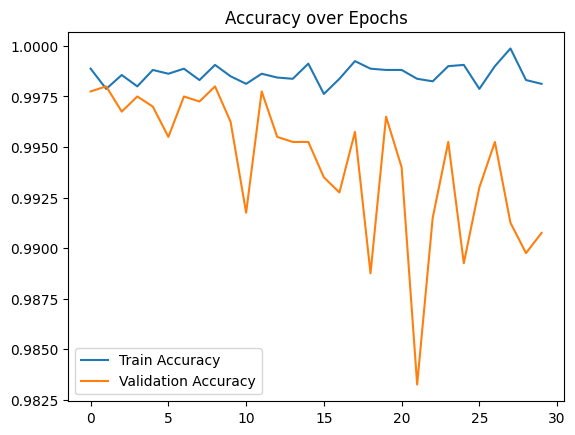

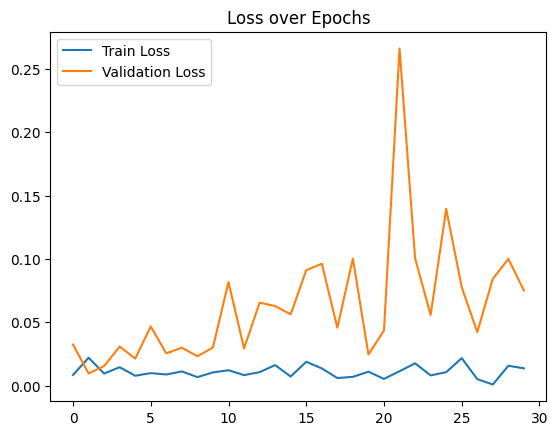

In [16]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

In [19]:
img = X_test[0]
img_reshaped = img.reshape(1, 28, 28, 1)  # batch size = 1

# Predict
pred = model.predict(img_reshaped)
predicted_class = np.argmax(pred)

print("Predicted class:", predicted_class)
print("Predicted class:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: 5
Predicted class: flower


In [20]:
model.save("doodle_recognizer_model.h5")